In [1]:
import pandas as pd
import os
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt
import time
import numpy as np
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import seaborn_image as isns
import matplotlib.colors as colors

isns.set_context("notebook")


In [2]:
data_path = '/Users/asimadnan/Desktop/Mres/ASVSPOOF_DATA/LA/ASVspoof2019_LA_train/sample'
labels_path = '/Users/asimadnan/Desktop/Mres/ASVSPOOF_DATA/LA/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.train.trn.txt'



In [27]:
features = []
for f in os.listdir(data_path):
    sample_file = data_path + '/' + f
    y, sr = librosa.load(sample_file)
    raw_fft = librosa.stft(y,n_fft=1024,win_length=128)
    phase = np.angle(raw_fft) 
    print(phase.T.shape)
    features.append(phase)
    

(1585, 513)
(2322, 513)
(1939, 513)
(1602, 513)
(2377, 513)
(1257, 513)


In [4]:
os.listdir(data_path)[0]
sample_file = data_path + '/' + os.listdir(data_path)[2]

In [5]:
y, sr = librosa.load(sample_file)

In [6]:
raw_fft = librosa.stft(y)
absolout_fft = np.abs(raw_fft) #amplitude
imaginary_fft = np.imag(raw_fft)
phase = np.angle(raw_fft) 

In [7]:
phase.shape

(1025, 122)

### Plot with sns

In [8]:
def plot_spechow(data,title=''):
    fig, ax = plt.subplots() 
    figure(figsize=(12, 8), dpi=80)

#     img = librosa.display.specshow(librosa.amplitude_to_db(data,ref=np.max),y_axis='log', x_axis='time', ax=ax)
    img = librosa.display.specshow(data,y_axis='log', x_axis='time', ax=ax)


    ax.set_title(title)
    fig.colorbar(img, ax=ax, format="%+2.0f dB")

In [16]:
absolout_fft.shape

(1025, 122)

## Plotting Using librosa spechow Function

/Users/asimadnan/opt/anaconda3/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Users/asimadnan/opt/anaconda3/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Users/asimadnan/opt/anaconda3/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


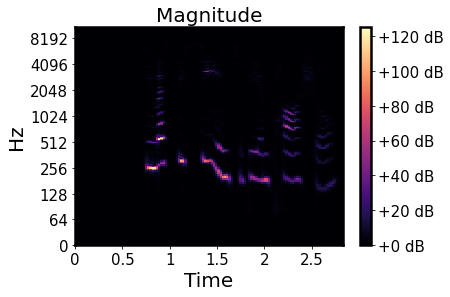

<Figure size 960x640 with 0 Axes>

In [15]:
plot_spechow(absolout_fft,title='Magnitude')

/Users/asimadnan/opt/anaconda3/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Users/asimadnan/opt/anaconda3/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Users/asimadnan/opt/anaconda3/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


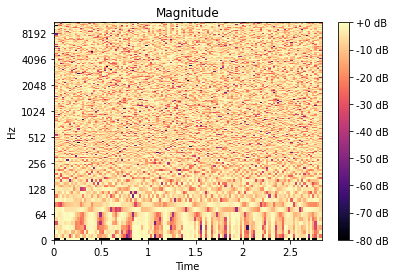

<Figure size 960x640 with 0 Axes>

In [50]:
plot_spechow(phase,title='Magnitude')

# Join phase and magnitude

In [51]:
joined = np.concatenate((absolout_fft,phase),axis=1)
joined.shape

(1025, 244)

/Users/asimadnan/opt/anaconda3/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Users/asimadnan/opt/anaconda3/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Users/asimadnan/opt/anaconda3/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


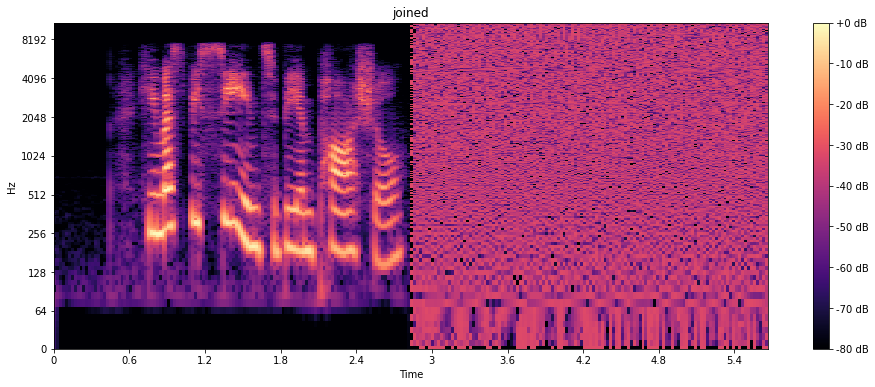

<Figure size 960x640 with 0 Axes>

In [52]:
plt.rcParams["figure.figsize"] = (16,6)

plot_spechow(joined,title='joined')

# checking different shapes of stft

In [28]:
n_ftt = [128,512,1024,2048]
hop_length = [1,2,3,4,5,6,7,8,9,10]
win_length = [64,128,512,1024,2048]
# center = [True,False]
# pad_mode = [True,False]

In [29]:
sample = []

for n in n_ftt:
    for h in hop_length:
        for w in win_length:
                if (w <= n):
                    raw_fft = librosa.stft(y, 
                                     n_fft=n, 
                                     hop_length=h, 
                                     win_length=w)
                    print('nftt: ',n,' ,hop_length:',h,' ,win_length:',w )
                    print(raw_fft.shape)
                    sample.append([raw_fft,n,h,w])

            

nftt:  128  ,hop_length: 1  ,win_length: 64
(65, 40214)
nftt:  128  ,hop_length: 1  ,win_length: 128
(65, 40214)
nftt:  128  ,hop_length: 2  ,win_length: 64
(65, 20107)
nftt:  128  ,hop_length: 2  ,win_length: 128
(65, 20107)
nftt:  128  ,hop_length: 3  ,win_length: 64
(65, 13405)
nftt:  128  ,hop_length: 3  ,win_length: 128
(65, 13405)
nftt:  128  ,hop_length: 4  ,win_length: 64
(65, 10054)
nftt:  128  ,hop_length: 4  ,win_length: 128
(65, 10054)
nftt:  128  ,hop_length: 5  ,win_length: 64
(65, 8043)
nftt:  128  ,hop_length: 5  ,win_length: 128
(65, 8043)
nftt:  128  ,hop_length: 6  ,win_length: 64
(65, 6703)
nftt:  128  ,hop_length: 6  ,win_length: 128
(65, 6703)
nftt:  128  ,hop_length: 7  ,win_length: 64
(65, 5745)
nftt:  128  ,hop_length: 7  ,win_length: 128
(65, 5745)
nftt:  128  ,hop_length: 8  ,win_length: 64
(65, 5027)
nftt:  128  ,hop_length: 8  ,win_length: 128
(65, 5027)
nftt:  128  ,hop_length: 9  ,win_length: 64
(65, 4469)
nftt:  128  ,hop_length: 9  ,win_length: 128
(65,

In [70]:
sample_2 = []

for n in n_ftt:
    raw_fft = librosa.stft(y,n_fft=n)
    print('raw_fft.shape',raw_fft.shape,'nftt: ',n,' ,hop_length:',h,' ,win_length:',w )
    sample_2.append([raw_fft,n,h,w])

            

raw_fft.shape (65, 1939) nftt:  128  ,hop_length: 10  ,win_length: 2048
raw_fft.shape (257, 485) nftt:  512  ,hop_length: 10  ,win_length: 2048
raw_fft.shape (513, 243) nftt:  1024  ,hop_length: 10  ,win_length: 2048
raw_fft.shape (1025, 122) nftt:  2048  ,hop_length: 10  ,win_length: 2048


/Users/asimadnan/opt/anaconda3/lib/python3.8/site-packages/librosa/core/spectrum.py:1641: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  warnings.warn(
/Users/asimadnan/opt/anaconda3/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Users/asimadnan/opt/anaconda3/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Users/asimadnan/opt/anaconda3/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __i

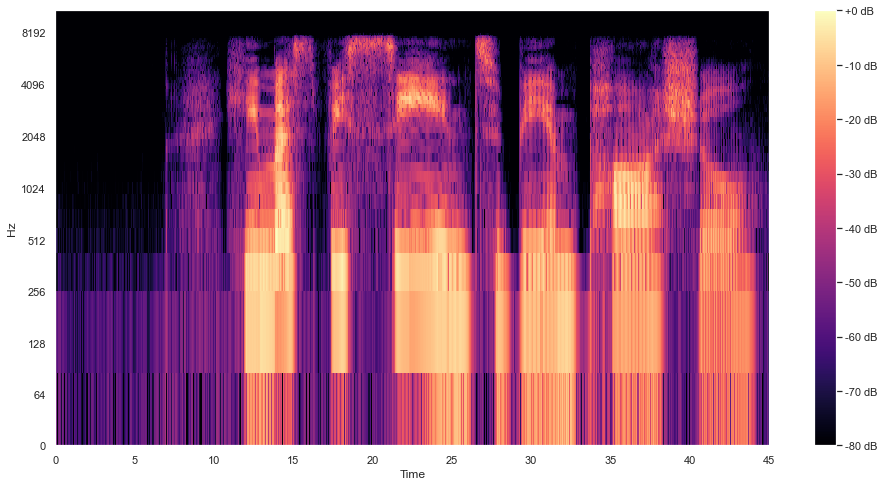

<Figure size 960x640 with 0 Axes>

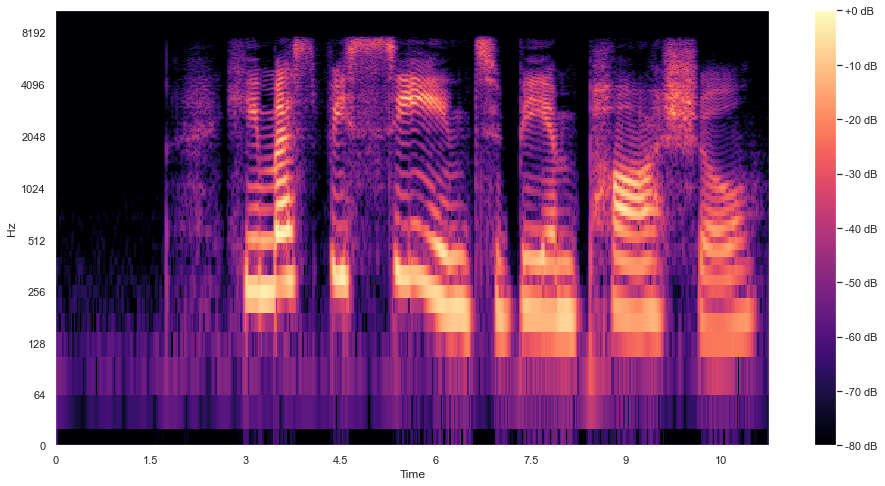

<Figure size 960x640 with 0 Axes>

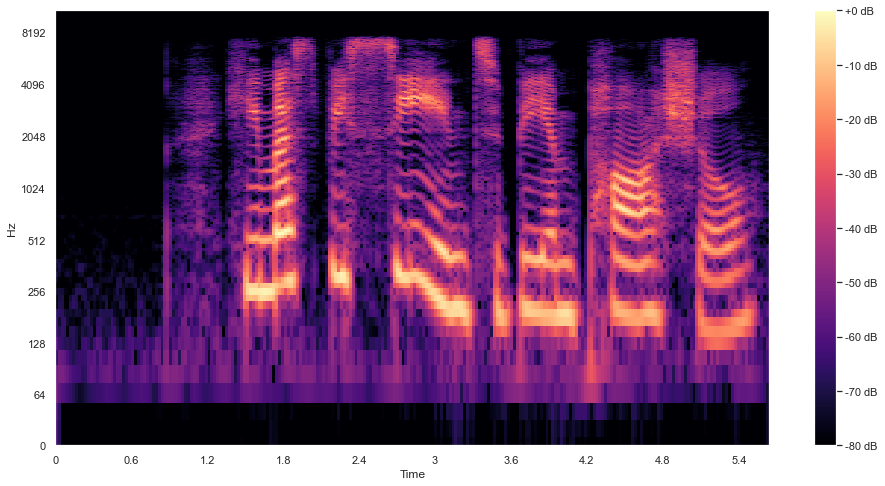

<Figure size 960x640 with 0 Axes>

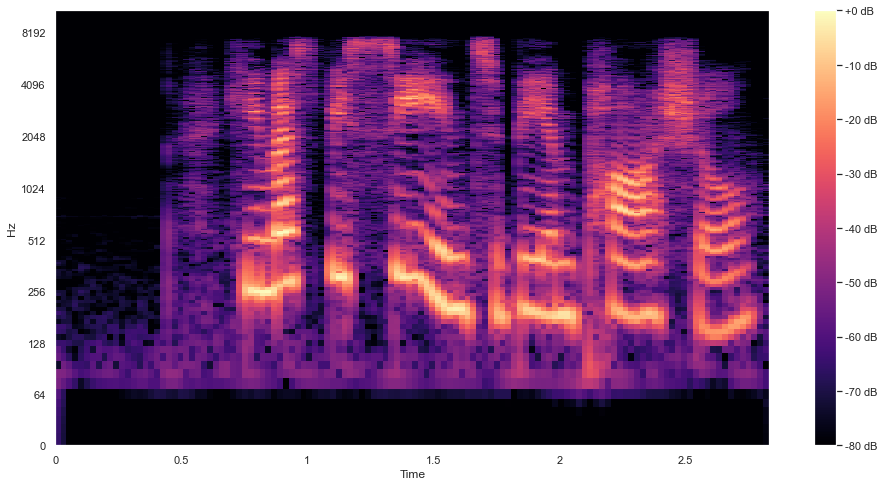

<Figure size 960x640 with 0 Axes>

In [71]:
for s in sample_2:
    plot_spechow(s[0])

In [32]:
import pandas as pd

In [37]:
ff = []
for s in sample:
    ff.append([s[0].shape[0],s[0].shape[1],s[1],s[2],s[3]])

In [39]:
samples = pd.DataFrame(ff)

In [57]:
samples.columns = ['x','y','nftt','hop','window']
samples

,x,y,nftt,hop,window
0,65,40214,128,1,64
1,65,40214,128,1,128
2,65,20107,128,2,64
3,65,20107,128,2,128
4,65,13405,128,3,64
...,...,...,...,...,...
135,1025,4022,2048,10,64
136,1025,4022,2048,10,128
137,1025,4022,2048,10,512
138,1025,4022,2048,10,1024


In [58]:
import seaborn as sns
sns.set_theme(style="darkgrid")


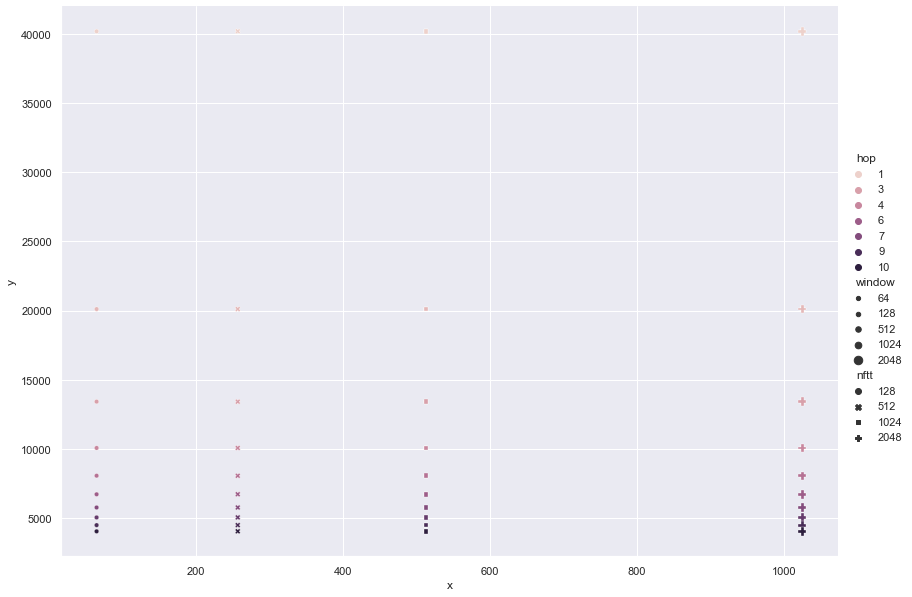

In [68]:
sns.set(rc={'figure.figsize':(16,8)})

sns.relplot(x="x", y="y",hue="hop",style="nftt",size='window', data=samples, height=8.27, aspect=11.7/8.27);

# Narrow and Wideband exploration

In [4]:
y, sr = librosa.load(sample_file)

In [17]:
sr

22050

## reducing N_FTT from default 2048 down to 512

(1025, 122)


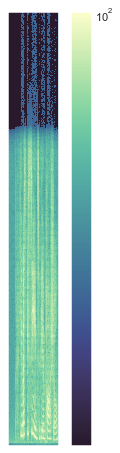

In [138]:
raw_fft = np.abs(librosa.stft(y))
ax = isns.imgplot(raw_fft,cbar_log=True)
print(raw_fft.shape)

(513, 243)


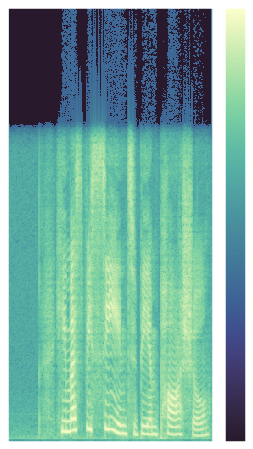

In [139]:
raw_fft = np.abs(librosa.stft(y,n_fft=1024))
ax = isns.imgplot(raw_fft,cbar_log=True)
print(raw_fft.shape)

(257, 158)


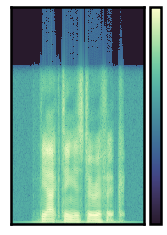

In [20]:
raw_fft = np.abs(librosa.stft(y,n_fft=512,hop_length=256))
ax = isns.imgplot(raw_fft,cbar_log=True)
print(raw_fft.shape)

(129, 158)


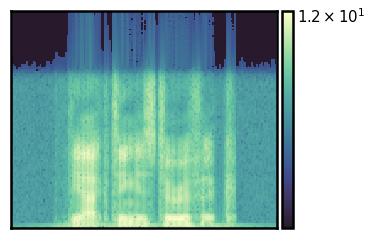

In [19]:
raw_fft = np.abs(librosa.stft(y,n_fft=256,hop_length=256))
ax = isns.imgplot(raw_fft,cbar_log=True)
print(raw_fft.shape)

### nfft 512 gives the wide spectrum

## Now working with window length, with nftt 512, default is equal to nftt
### Note:
- Smaller values improve the temporal resolution of the STFT at the expense of frequency resolution
- 

(257, 970)


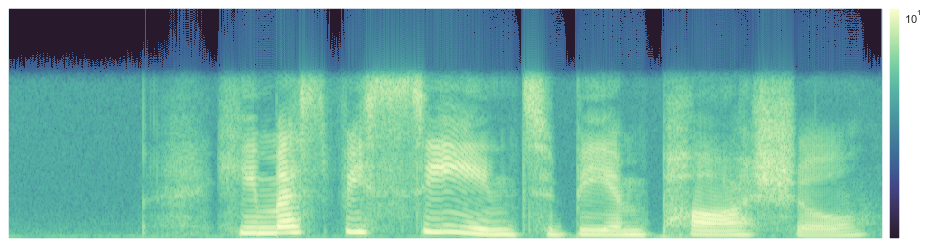

In [142]:
raw_fft = np.abs(librosa.stft(y,n_fft=512,win_length=256))
ax = isns.imgplot(raw_fft,cbar_log=True)
print(raw_fft.shape)

(257, 1939)


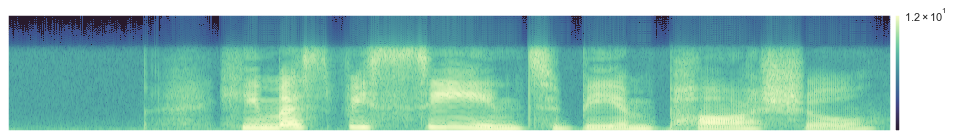

In [143]:
raw_fft = np.abs(librosa.stft(y,n_fft=512,win_length=128))
ax = isns.imgplot(raw_fft,cbar_log=True)
print(raw_fft.shape)

(257, 3877)


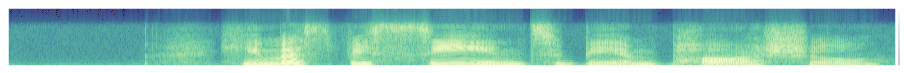

In [144]:
raw_fft = np.abs(librosa.stft(y,n_fft=512,win_length=64))
ax = isns.imgplot(raw_fft,cbar_log=True)
print(raw_fft.shape)

## as win lenght reduced spectrum gets longer

# Now trying diff hops with nftt 512 & win 512
## number of audio samples between adjacent STFT columns.
## default hop_len = win_lenght // 4, in this case default 128

(257, 485)


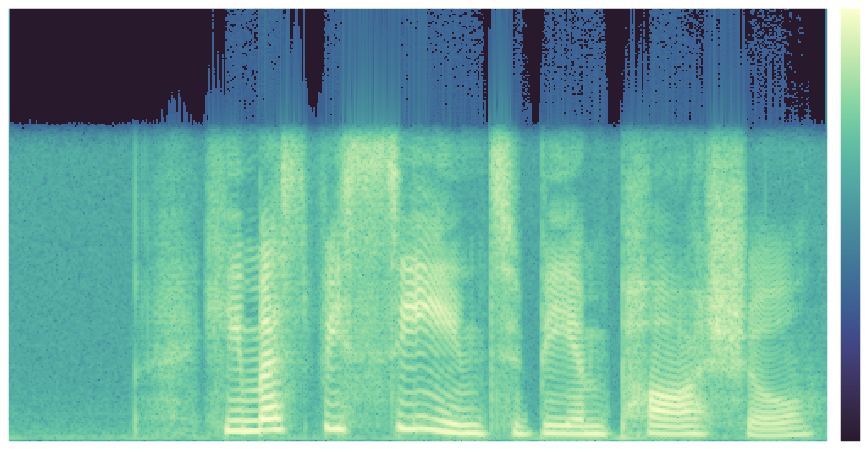

In [147]:
raw_fft = np.abs(librosa.stft(y,n_fft=512,win_length=512,hop_length=128))
ax = isns.imgplot(raw_fft,cbar_log=True)
print(raw_fft.shape)

(257, 970)


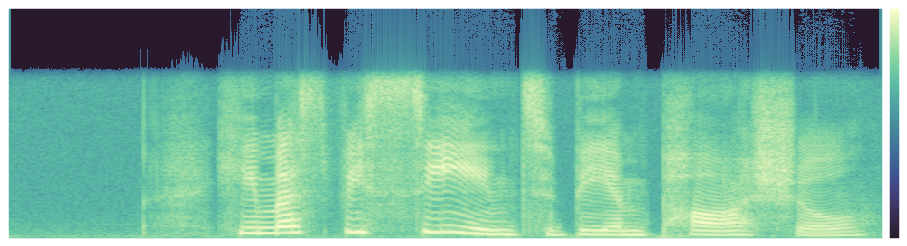

In [148]:
raw_fft = np.abs(librosa.stft(y,n_fft=512,win_length=512,hop_length=64))
ax = isns.imgplot(raw_fft,cbar_log=True)
print(raw_fft.shape)

(257, 1939)


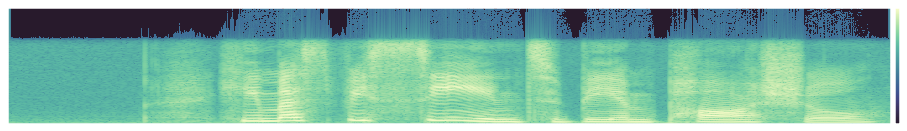

In [149]:
raw_fft = np.abs(librosa.stft(y,n_fft=512,win_length=512,hop_length=32))
ax = isns.imgplot(raw_fft,cbar_log=True)
print(raw_fft.shape)

(257, 243)


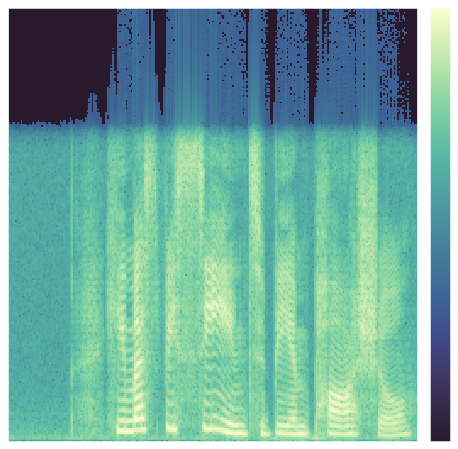

In [150]:
raw_fft = np.abs(librosa.stft(y,n_fft=512,win_length=512,hop_length=256))
ax = isns.imgplot(raw_fft,cbar_log=True)
print(raw_fft.shape)

(257, 122)


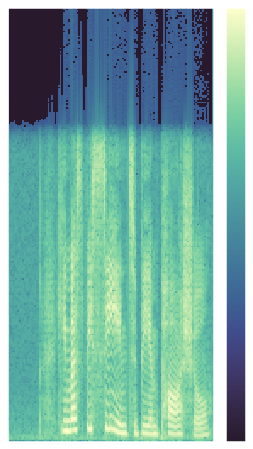

In [151]:
raw_fft = np.abs(librosa.stft(y,n_fft=512,win_length=512,hop_length=512))
ax = isns.imgplot(raw_fft,cbar_log=True)
print(raw_fft.shape)

(65, 1939)


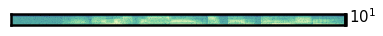

In [21]:
raw_fft = np.abs(librosa.stft(y,n_fft=128))
ax = isns.imgplot(raw_fft,cbar_log=True)
print(raw_fft.shape)

(513, 315)


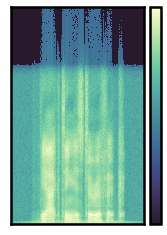

In [29]:
raw_fft = np.abs(librosa.stft(y,n_fft=1024,win_length=512))
ax = isns.imgplot(raw_fft,cbar_log=True)
print(raw_fft.shape)

(257, 629)


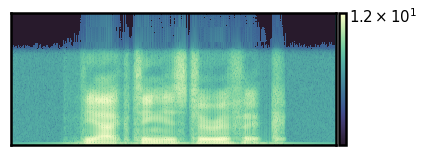

In [32]:
raw_fft = np.abs(librosa.stft(y,n_fft=512,win_length=256))
ax = isns.imgplot(raw_fft,cbar_log=True)
print(raw_fft.shape)

(1025, 243)
No. of Obs. : 249075
Min. Value : 1.9408981366542122e-11
Max. Value : 83.07601928710938
Mean : 0.34929993748664856
Variance : 4.022810935974121
Skewness : 15.608257293701172


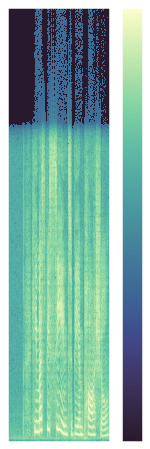

In [121]:
y, sr = librosa.load(sample_file)
raw_fft = librosa.stft(y, n_fft=2048,win_length=1024)
narrow = np.abs(raw_fft)
# plot_spechow(narrow)
print(raw_fft.shape)
ax = isns.imgplot(narrow, describe=True,cbar_log=True)



(1025, 31010)
No. of Obs. : 31785250
Min. Value : 2.6225402058321912e-11
Max. Value : 8.928023338317871
Mean : 0.12737400829792023
Variance : 0.24477232992649078
Skewness : 6.758881568908691


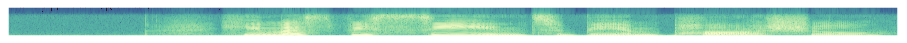

In [126]:
y, sr = librosa.load(sample_file)
raw_fft = librosa.stft(y, n_fft=2048,win_length=64,hop_length=2)
wide = np.abs(raw_fft)
# plot_spechow(wide)
print(raw_fft.shape)
ax = isns.imgplot(wide, describe=True,cbar_log=True,norm=colors.LogNorm())

